# Machine Learning
## Lab 02 | KNN Implementation
This is the codesheet for lab assignment dated September 1, 2020.  The task is to implement KNN. 

### a) Load Diabetes dataset

In [2]:
from pandas import read_csv

dataset_url = "https://raw.githubusercontent.com/sayoojsamuel/MachineLearning/master/labs/lab-01/diabetes_dataset.csv"
data = read_csv(dataset_url)
colnames=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'] 
print(data.shape) 

(768, 9)


### b) Peek rows

In [3]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [15]:
arr = data.values
X = features = arr[:,0:8]
Y = outcome = arr[:,8]

### c) Split dataset

In [19]:
partition_X = int(0.8 * len(X))
X_train, X_test = X[:partition_X], X[partition_X:]
Y_train, Y_test = Y[:partition_X], Y[partition_X:]


### d) Split with inbuilt functions

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print(X_test)

[[  2.     85.     65.    ...  39.6     0.93   27.   ]
 [  6.     91.      0.    ...  29.8     0.501  31.   ]
 [  0.    118.     84.    ...  45.8     0.551  31.   ]
 ...
 [  7.    187.     68.    ...  37.7     0.254  41.   ]
 [  4.    151.     90.    ...  29.7     0.294  36.   ]
 [  4.    146.     92.    ...  31.2     0.539  61.   ]]


### e) Normalize


In [25]:
from sklearn.preprocessing import StandardScaler 
import numpy as np

X_test=StandardScaler().fit_transform(X_test)

X_train=StandardScaler().fit_transform(X_train)


In [26]:
print(X_train[:2,])

[[-0.82552189  0.23401198 -1.07049598  1.54608133  0.93098585  1.07268695
   0.41824075 -0.77730832]
 [-0.23510786  2.17985277 -0.04324814 -0.34080783  0.3926689  -0.11398884
  -0.52608631  0.05416783]]


### f) Invoke KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier  

classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)


In [29]:
print(Y_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### e) Evaluate KNN


In [30]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(Y_test, Y_pred))  
print(classification_report(Y_test, Y_pred))  

[[77 13]
 [41 23]]
              precision    recall  f1-score   support

         0.0       0.65      0.86      0.74        90
         1.0       0.64      0.36      0.46        64

    accuracy                           0.65       154
   macro avg       0.65      0.61      0.60       154
weighted avg       0.65      0.65      0.62       154



In [31]:
confusion = confusion_matrix(Y_test, Y_pred)

In [34]:
print("Correct Predictions = ", confusion[1][1]+confusion[0][0])

Correct Predictions =  100


### 8) KNN for different k values

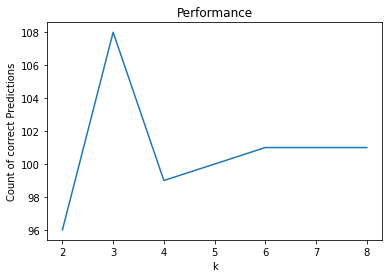

In [40]:
import matplotlib.pyplot as plt
dif_k = [2,3,4,5,6,7,8]
correct_pred = list()
for k in dif_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    cm = confusion_matrix(Y_test,Y_pred)
    correct_pred.append(cm[0][0]+cm[1][1])
plt.plot(dif_k,correct_pred)

plt.xlabel('k')
plt.ylabel('Count of correct Predictions')

plt.title('Performance')

plt.show()